In [1]:
''' Install packages ''' 
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
''' Import packages '''

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
import re
import os
from tqdm.notebook import tqdm
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from wordcloud import WordCloud, STOPWORDS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
text_df = pd.read_csv("/content/text_data.csv")
text_df

,raw_text,class_label
0,From: crphilli@hound.dazixca.ingr.com (Ron Phi...,talk.politics.guns
1,From: FL2G@gandalf.fl.bs.dlr.de (Reiner Suikat...,comp.os.ms-windows.misc
2,From: schuster@panix.com (Michael Schuster) Su...,sci.electronics
3,From: whit@carson.u.washington.edu (John Whitm...,sci.electronics
4,From: oeth6050@iscsvax.uni.edu Subject: ****CO...,misc.forsale
...,...,...
18823,From: pduggan@world.std.com (Paul C Duggan) Su...,soc.religion.christian
18824,From: sandvik@newton.apple.com (Kent Sandvik) ...,alt.atheism
18825,From: tmc@spartan.ac.BrockU.CA (Tim Ciceran) S...,comp.sys.ibm.pc.hardware
18826,From: fcrary@ucsu.Colorado.EDU (Frank Crary) S...,sci.space


In [14]:
# check nan values
text_df.isnull().sum()

raw_text       0
class_label    0
dtype: int64

In [15]:
# check nan values in dataset
text_df.dropna(inplace=True)

In [16]:
text_df.shape

(18828, 2)

In [ ]:
label_name_counts = text_df['class_label'].value_counts()
label_name = label_name_counts.index
label_counts = label_name_counts.values

fig = px.bar(x=label_name, y=label_counts, color=label_name)
fig.update_layout(title="label counts", xaxis_title="labels", yaxis_title="counts")
fig.show()

In [ ]:
def extract_text(df) :

    '''
    Input :
        name    : df
        type    : pandas dataframe
        content : dataframe must have raw_data column which contains
                  raw email ids

    Output :
        name    : new_df
        type    : pandas dataframe
        content : dataframe contains different column extracted information
                  by input dataframe


    Process :   
        This function extract email id, email subject, email text data
        and seperate into columns and creat new dataframe.   
    '''


    upper, middle, lower = [],[],[]
    raw_text = [ ]
    for row in tqdm(df['raw_text'].values) :

        # extract all raw data
        raw_text.append(row)

        # extract email id data 
        email_id_data = re.split('subject:|subject:|re:', row)[0]
        upper.append(email_id_data)

        # extract email text
        email_text_data = re.split('write:|:write to:|wrote:|wrote to:|writes:|writes to:|quoth:', row)[-1]
        lower.append(email_text_data)

        # extract email subject data
        temp = "".join(re.split('subject:|subject:|re:', row)[1:])
        email_subject_data = re.split("write:|:write to:|wrote:|wrote to:|writes:|writes to:", temp)[0]
        middle.append(email_subject_data)

    new_df = pd.DataFrame({"email_id" : upper, "email_subject" : middle, "email_text" : lower, "raw_text" : raw_text})

    return new_df

In [ ]:
text_Df2 = extract_text(text_df['raw_text'].str.lower())

In [ ]:
text_Df2['labels'] = text_df['class_label']

In [ ]:
text_Df2.sample(10)

,email_id,email_subject,email_text,raw_text,labels
13964,from: orville%weyrich@uunet.uu.net (orville r....,wanted: floppy controller that can handle mul...,from: orville%weyrich@uunet.uu.net (orville r....,from: orville%weyrich@uunet.uu.net (orville r....,talk.politics.mideast
14510,from: c558172@mizzou1.missouri.edu,the 1964 phillies: deja vu? in article <1993...,"> > >after reading my local paper today, i fo...",from: c558172@mizzou1.missouri.edu subject: re...,comp.sys.ibm.pc.hardware
8625,from: bil@okcforum.osrhe.edu (bill conner),islamic authority over women benedikt rosena...,: when the object of their belief is said to ...,from: bil@okcforum.osrhe.edu (bill conner) sub...,rec.sport.hockey
11435,from: steveg@cadkey.com (steve gallichio),"the most average player in the nhl and now, i...",from: steveg@cadkey.com (steve gallichio) subj...,from: steveg@cadkey.com (steve gallichio) subj...,comp.os.ms-windows.misc
5954,from: victor@comms.ee.man.ac.uk (victor buttig...,cpu temperature vs cpu activity ? lino montu...,>this may be a very naive question but is the...,from: victor@comms.ee.man.ac.uk (victor buttig...,comp.sys.mac.hardware
14301,from: kolstad@cae.wisc.edu (joel kolstad),can radio freq. be used to measure distance?...,>what is the difference between vertical and ...,from: kolstad@cae.wisc.edu (joel kolstad) subj...,comp.windows.x
670,from: scott.frost@cas.org (scott frost),how to draw in invert mode with color how can...,from: scott.frost@cas.org (scott frost) subjec...,from: scott.frost@cas.org (scott frost) subjec...,comp.windows.x
767,from: mark@physchem.ox.ac.uk (mark jackson),386 motherboard advice needed in article <1r...,"> hi, > > does anyone have a source for 386dx...",from: mark@physchem.ox.ac.uk (mark jackson) su...,comp.sys.ibm.pc.hardware
8577,from: pdh@netcom.com (p d h),an open letter to mr. clinton ld231782@lance...,">i'm quite astonished, shocked, and appalled ...",from: pdh@netcom.com (p d h) subject: re: an o...,sci.med
13439,from: jhan@debra.dgbt.doc.ca (jerry han),"overreacting (was once tapped, your code is...",> > somebody asked me what was wrong about ov...,from: jhan@debra.dgbt.doc.ca (jerry han) subje...,comp.sys.mac.hardware


In [ ]:
def Word_Cloud(df, col_name) :


    '''
    Input :
        name    : df
        type    : pandas dataframe
        content : dataframe must have raw_data, email_id, email_subject, email_text
                  column which contains raw email ids

        name    : col_name
        type    : str
        content : dataframe column name which contains text

    Output :
        return  : None
        content : Plot word cloud

    Process :   
        This function take inputs and based column name
        generate word could for text visulization.
        
    '''

    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df.values:
        
        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image					
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title("Word Cloud of " + col_name)
    plt.show()


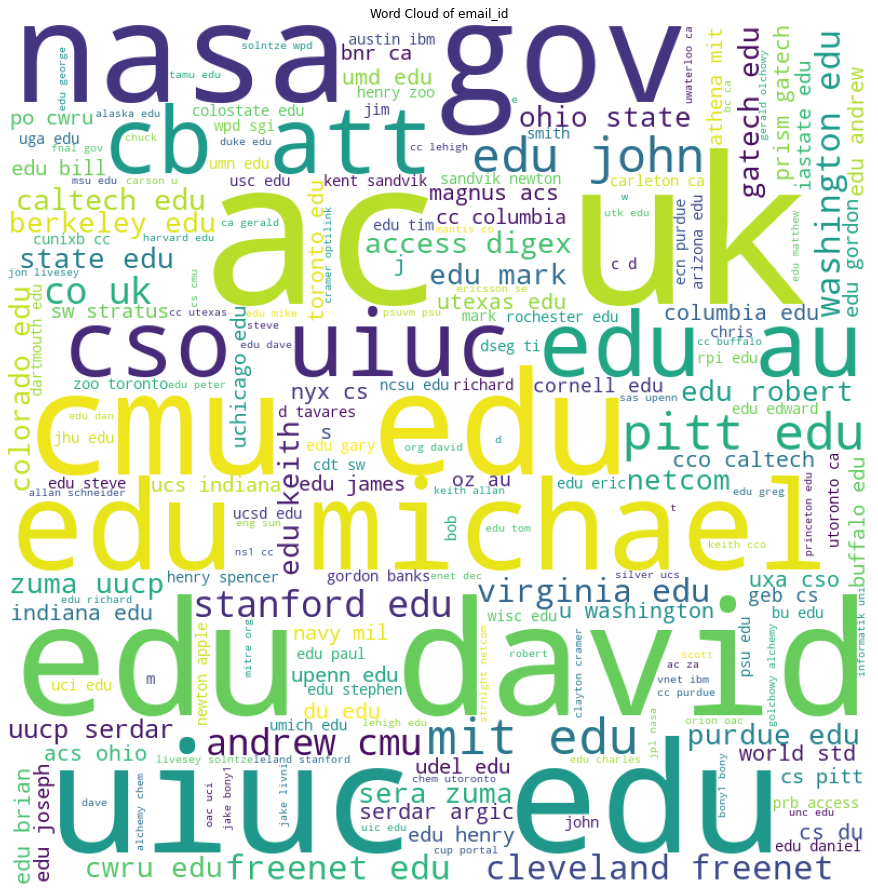

In [ ]:
Word_Cloud(text_Df2["email_id"], "email_id")     # word cloud for email id 

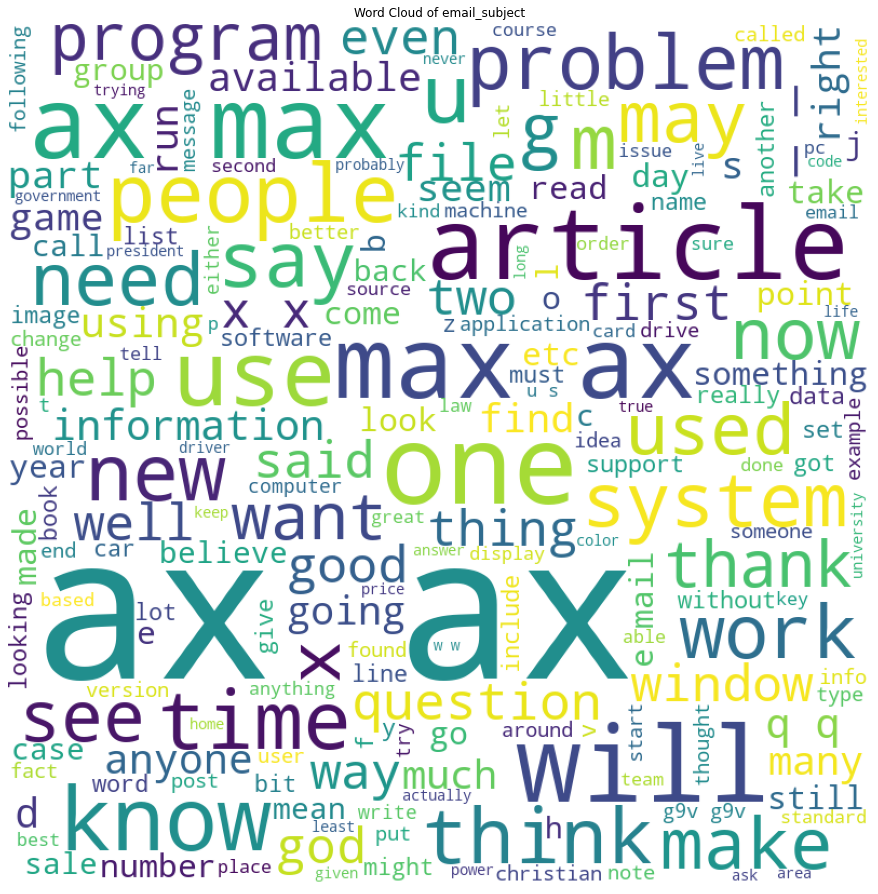

In [ ]:
Word_Cloud(text_Df2["email_subject"], "email_subject")      # word cloud for email subject 

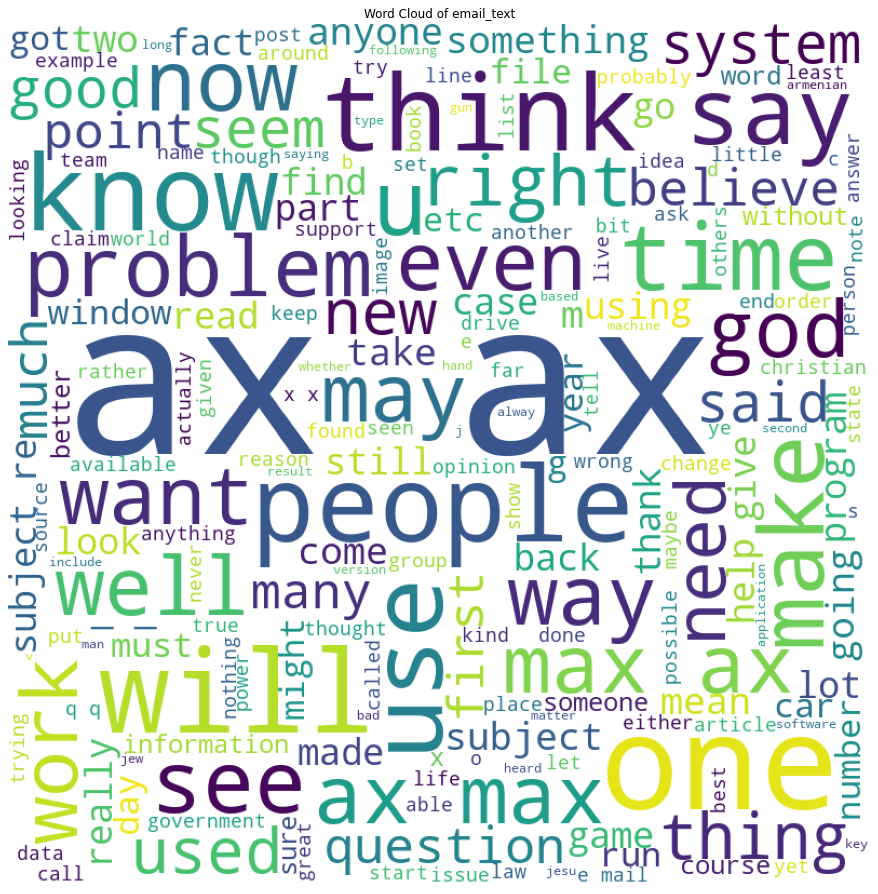

In [ ]:
Word_Cloud(text_Df2["email_text"], "email_text")            # word cloud for email text

In [ ]:
email_id_len = text_Df2['email_id'].str.len()
fig = px.histogram(email_id_len.values, nbins=150)
fig.update_layout(title="histogram of email id len")
fig.show()

In [ ]:
email_id_len = text_Df2['email_subject'].str.len()
fig = px.histogram(email_id_len.values, nbins=150)
fig.update_layout(title="histogram of email subject len")
fig.show()

In [ ]:
email_id_len = text_Df2['email_text'].str.len()
fig = px.histogram(email_id_len.values, nbins=150)
fig.update_layout(title="histogram of email text len")
fig.show()

In [ ]:
for label in text_Df2['labels'].unique()[:-1] :

    data = text_Df2[text_Df2.labels == label]["raw_text"].str.len()
    fig = px.histogram(data.values, nbins=150)
    fig.update_layout(title="histogram of " + str(label) + " text len")
    fig.show()